In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
#reading the dataset
df = pd.read_csv('/content/sample_data/heart_disease.csv',index_col=False)

In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


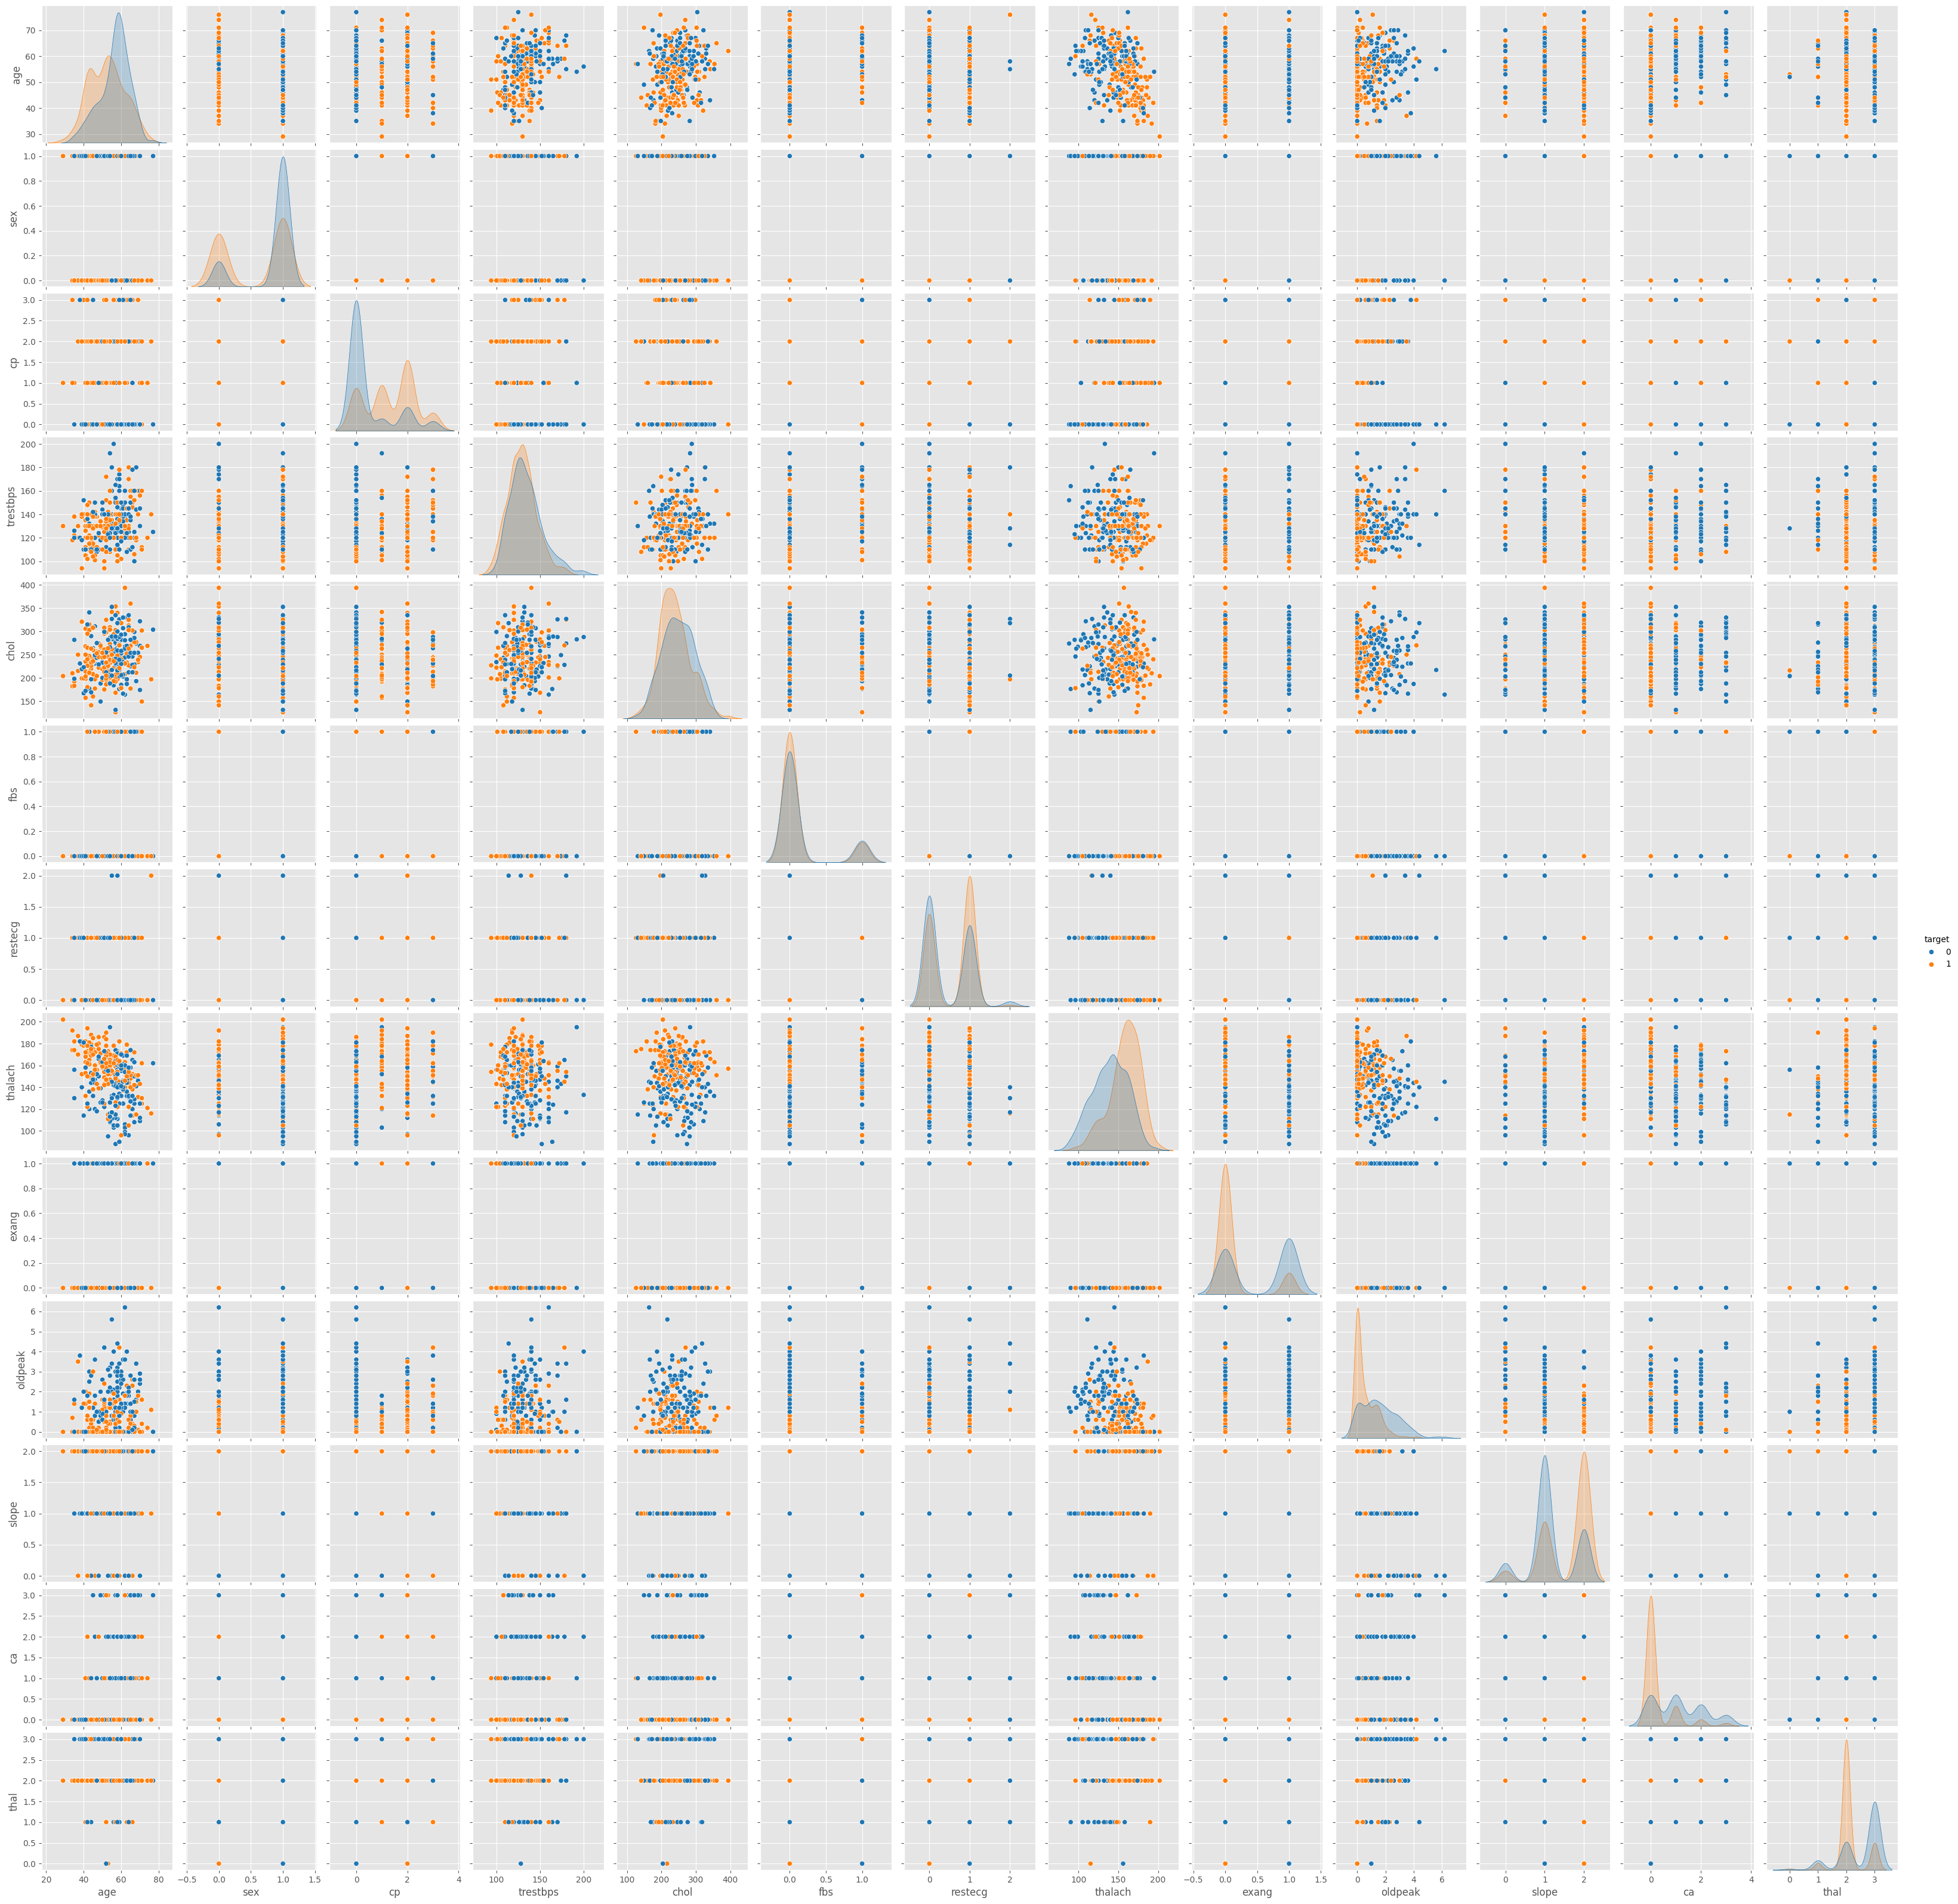

In [129]:
##pairplot for the numerical variables
sns.pairplot(data=df,hue='target')
plt.show()

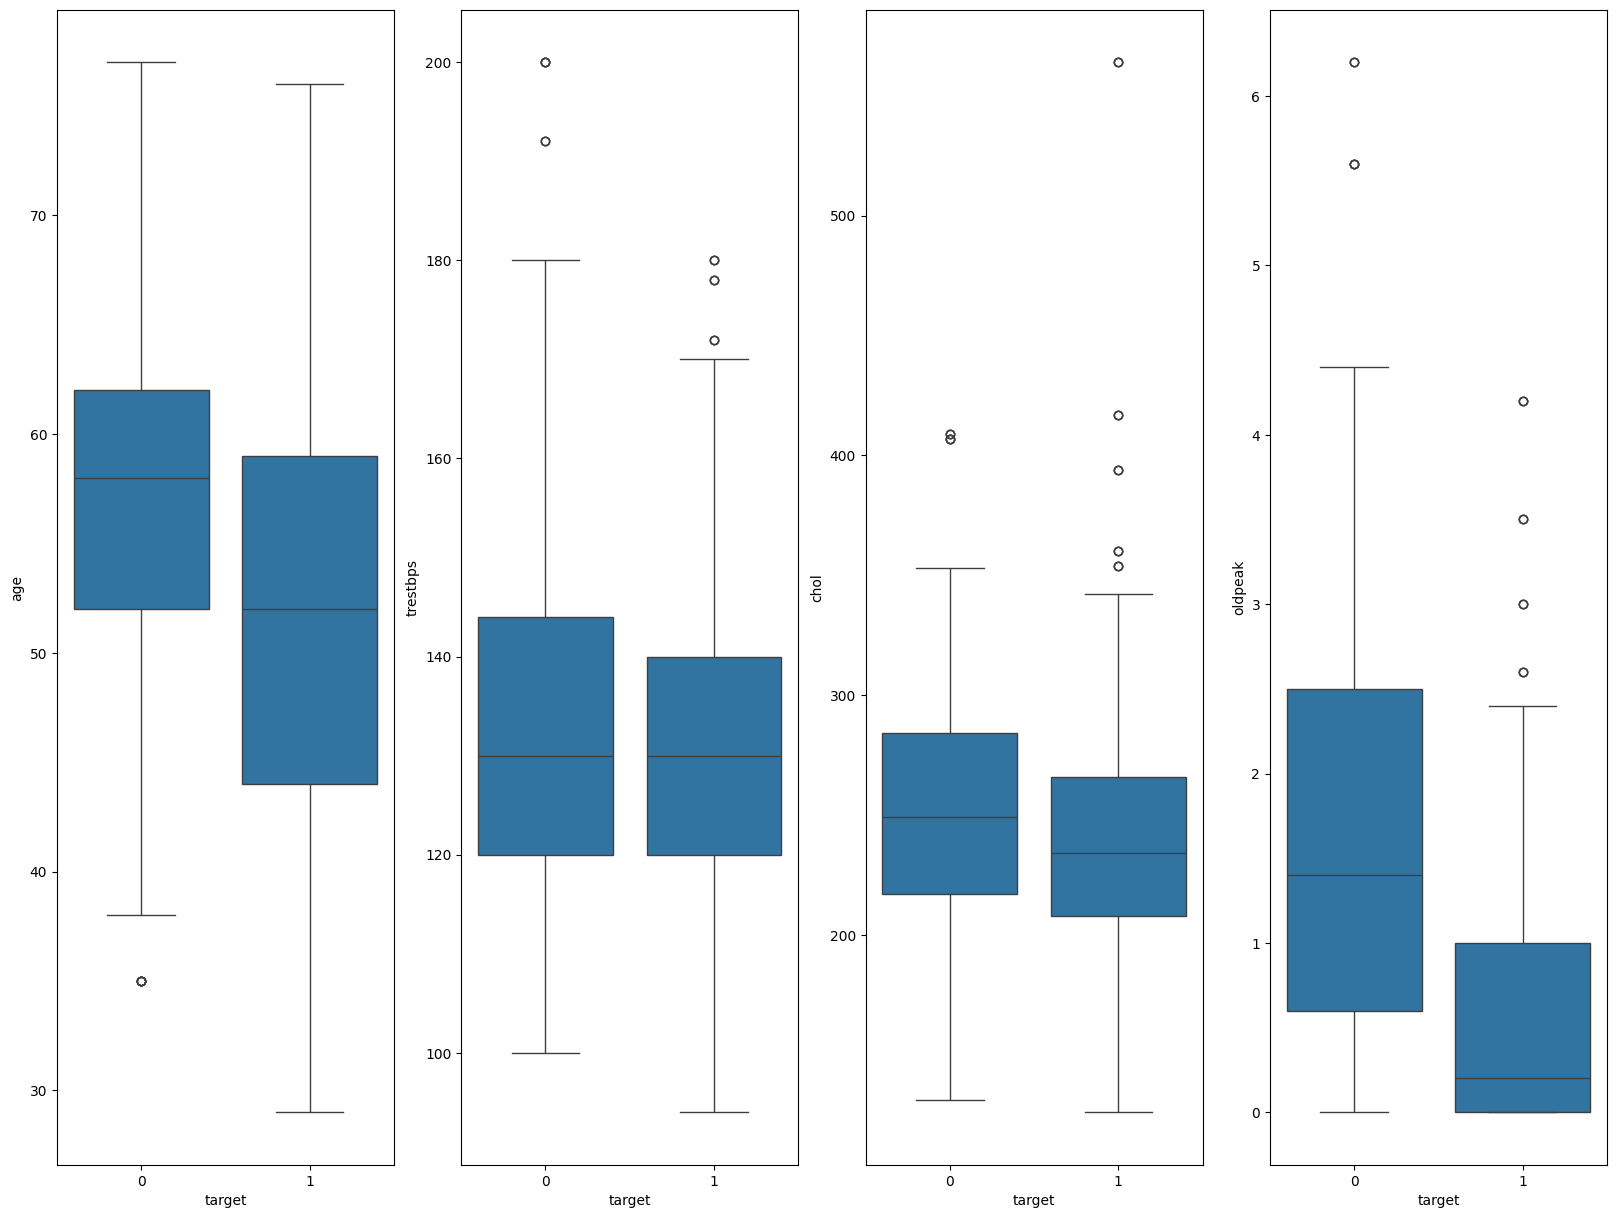

In [5]:
num = ['age','trestbps' ,'chol','oldpeak']

fig,ax=plt.subplots(1,4,figsize=(20,15))
ax=ax.ravel()

for index, col in enumerate(num):
    sns.boxplot(x='target',y=col,data=df, ax=ax[index])

In [6]:
bins  =   [29,41,53,65,78]
labels = ['29-40', '41-52','53-64','65-77']
df['Age_Group'] = pd.cut(df['age'],right=False , bins= bins,labels = labels)
df['Age_Group']

,Age_Group
0,41-52
1,53-64
2,65-77
3,53-64
4,53-64
...,...
1020,53-64
1021,53-64
1022,41-52
1023,41-52


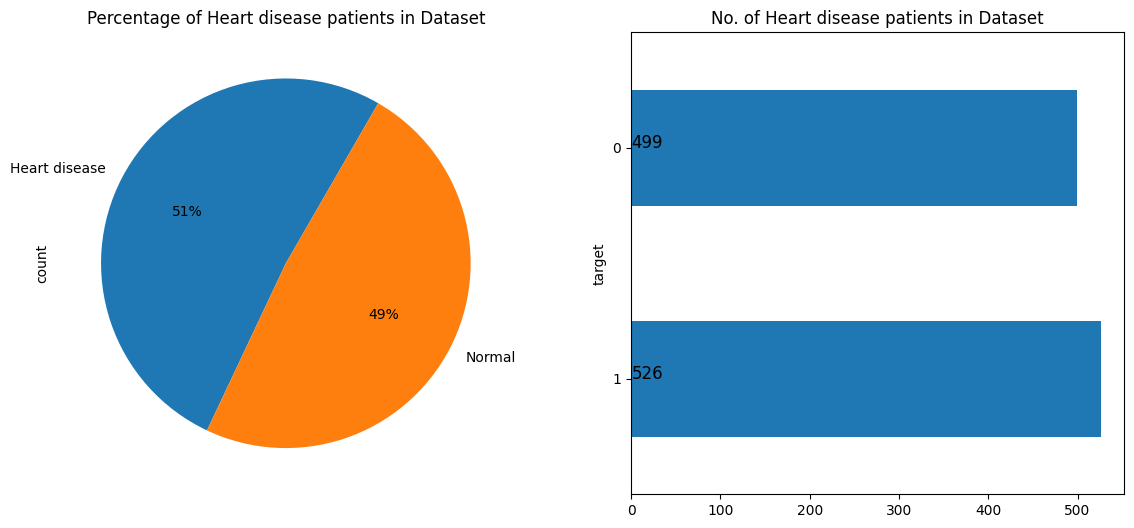

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['target'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients',
                   autopct = "%1.0f%%",labels=["Heart disease", "Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["target"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()
# The dataset seems balanced having 499 heart disease patients and 526 normal patients

<Axes: xlabel='restecg'>

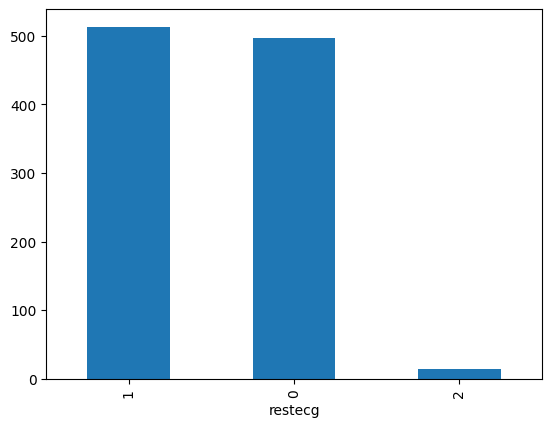

In [8]:
df['restecg'].value_counts().plot(kind='bar')

In [9]:
df.nunique().sort_values()

,0
sex,2
fbs,2
exang,2
target,2
restecg,3
slope,3
cp,4
thal,4
Age_Group,4
ca,5


In [10]:
# based on the data above, the fields can be divided into categorical and numeric
ccol = ['sex','cp','fbs','restecg','exang','slope' ,'ca','thal','target']
ncol = ['age','trestbps','chol','thalach','oldpeak']

In [11]:
df[ncol].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


**Few observations from the description table:**

The age in the dataset ranges from 29 to 77 with a mean value of 55.

Cholesterol level shows high standard deviation with a maximum value of 564

Resting blood pressure and Maximum heart rate achieved also have high standard deviation

**Data Exploring and Cleaning**

**Data Exploring of the Numeric Fields**

**1. Age**
         : Many studies suggest that people age 65 and older are much more likely than younger people to suffer a heart attack, to have a stroke, or to develop coronary heart disease and heart failure. It is happening to younger adults more often because of the high rates of obesity and high blood pressure among younger people (ages 35–64)

In [12]:
def plot_hist_box(col):
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=False)
    sns.histplot (ax = axes[0], x= df[col], kde=True)
    sns.boxplot (ax = axes[1], x=col, data=df)

In [13]:
df['age'].describe()

,age
count,1025.000000
mean,54.434146
std,9.072290
min,29.000000
25%,48.000000
50%,56.000000
75%,61.000000
max,77.000000


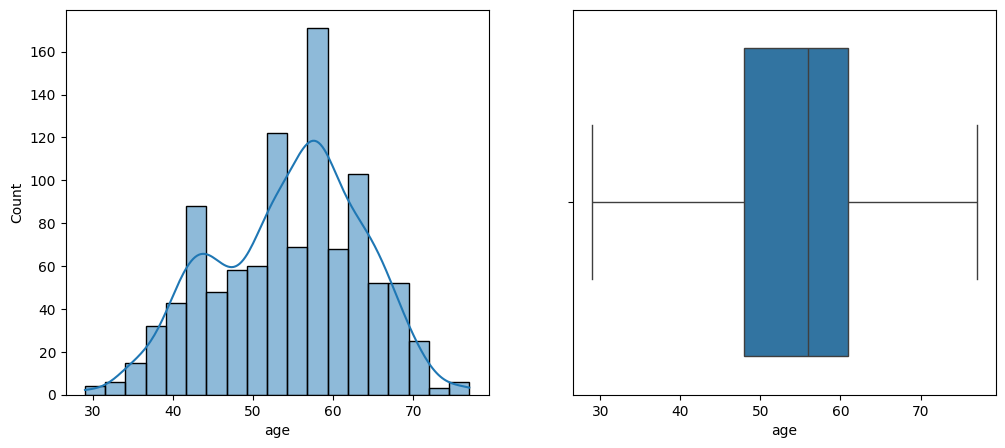

In [14]:
plot_hist_box('age')

**2. Cholesterol Level**

Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.

In [15]:
# 50% of the data sample shows high cholestrol level (>=240mg/dL)
df['chol'].describe()

,chol
count,1025.00000
mean,246.00000
std,51.59251
min,126.00000
25%,211.00000
50%,240.00000
75%,275.00000
max,564.00000


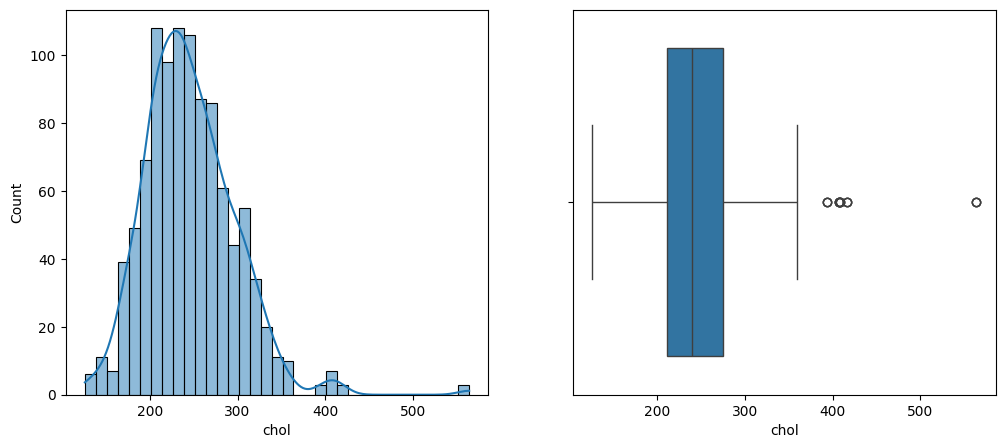

In [16]:
plot_hist_box('chol')

In [17]:
df.sort_values('chol').tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Group
665,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,65-77
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,65-77
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,65-77
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,65-77
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,65-77


In [18]:
q1,q3 = np.percentile(df['chol'],[25,75])
max = q3+(q3-q1)*1.5
min = q1-(q3-q1)*1.5
print (max)
print (min)

371.0
115.0


In [19]:
df[df['chol']>max]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Group
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,65-77
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,65-77
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,53-64
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,65-77
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1,53-64
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0,53-64
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,65-77
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0,53-64
542,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1,53-64
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1,53-64


In [20]:
print("number of observation with cholestrol level more than {} is".format(max), df[df['chol']>max].shape[0])
print("number of observation with cholestrol level more than 400 is {}".format(df[df['chol']>500].shape[0]))

number of observation with cholestrol level more than 371.0 is 16
number of observation with cholestrol level more than 400 is 3


In [21]:
df = df.drop(df[df['chol']>400].index)
df.shape

(1012, 15)

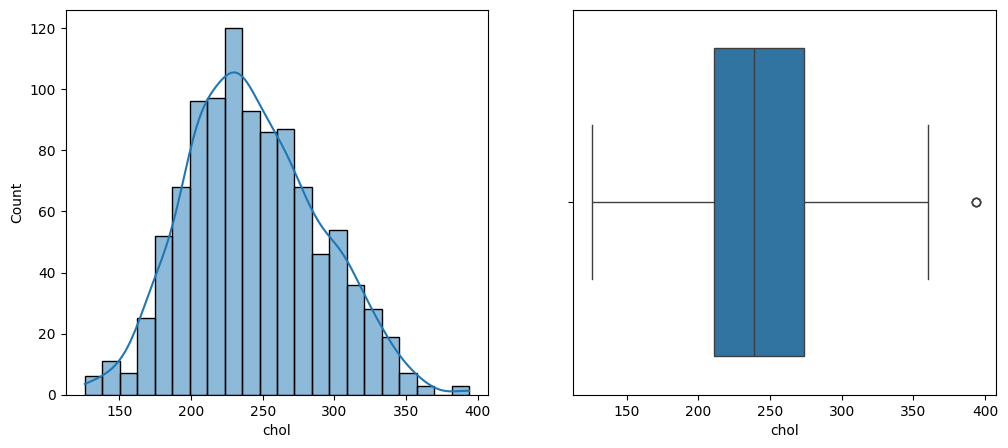

In [22]:
# after removing outliers
plot_hist_box('chol')

**3. Resting blood pressure**

Maximum blood pressure values of 120/80 when physically at rest are considered ideal for an adult. Blood pressure levels up to 139/89 are within the normal range that do not pose any health risk. A blood pressure reading above 180/120 mm Hg indicates a serious health problem. The AHA refers to these high measurements as a “hypertensive crisis.” Blood pressure in this range requires urgent treatment even if there are no accompanying symptoms.

In [23]:
# 75% of the sample show high blood pressure >=140
df['trestbps'].describe()

,trestbps
count,1012.000000
mean,131.556324
std,17.561191
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


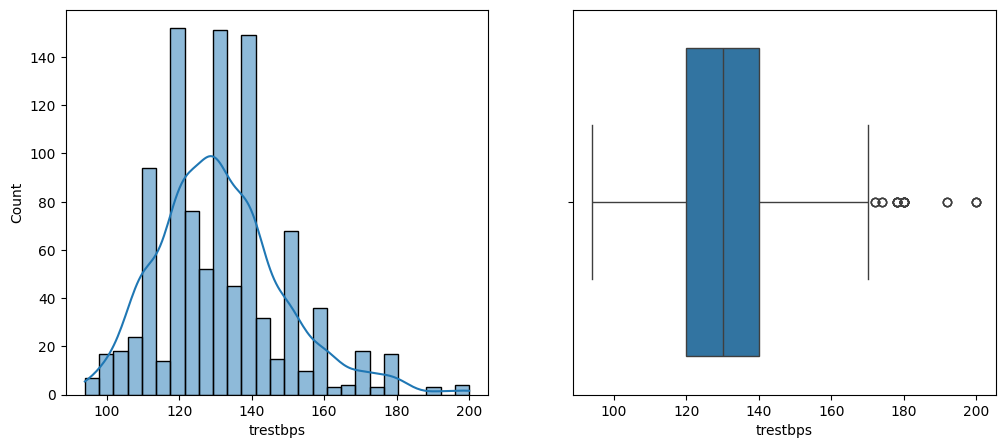

In [24]:
plot_hist_box('trestbps')

In [25]:
df.sort_values('trestbps').tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Group
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,53-64
508,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,53-64
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,53-64
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,53-64
688,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,53-64


In [26]:
q1,q3 = np.percentile(df['trestbps'],[25,75])
max = q3+(q3-q1)*1.5
min = q1-(q3-q1)*1.5
print (max)
print (min)

170.0
90.0


In [27]:
df[df['trestbps']>max]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Group
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0,53-64
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0,65-77
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,53-64
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1,53-64
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,53-64
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,53-64
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0,65-77
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,53-64
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1,53-64
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,53-64


In [28]:
print("number of observation with resting blood pressure more than {} is".format(max), df[df['trestbps']>max].shape[0])
print("number of observation with resting blood pressure more than 200 is", df[df['trestbps']>200].shape[0])

number of observation with resting blood pressure more than 170.0 is 30
number of observation with resting blood pressure more than 200 is 0


"It's clear that as the age increases chances of heart disease increases"

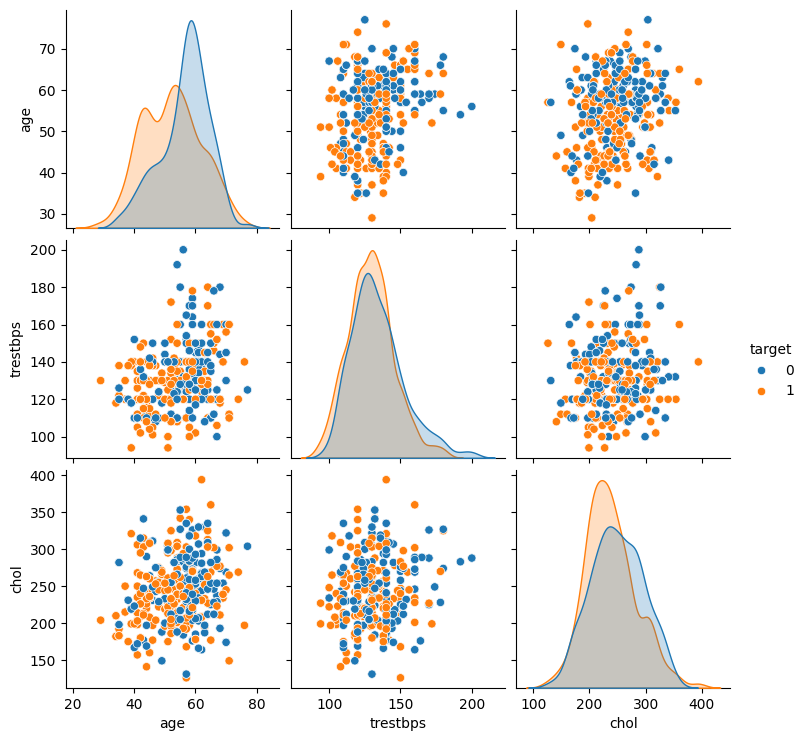

In [29]:
# Lets plot the pair wise analyis of the numerical features - age, restbps, cholestrol
sns.pairplot(df, hue = 'target', vars = ['age', 'trestbps', 'chol'] )
'''It's clear that as the age increases chances of heart disease increases'''

**4. Maximum heart rate achieved**

Maximum heart rate (HR) is important when interpreting adequacy of physiologic stress during exercise testing, assessing chronotropic response, and prescribing an exercise training regime

In [30]:
df['thalach'].describe()

,thalach
count,1012.000000
mean,149.036561
std,23.139359
min,71.000000
25%,132.000000
50%,152.000000
75%,166.000000
max,202.000000


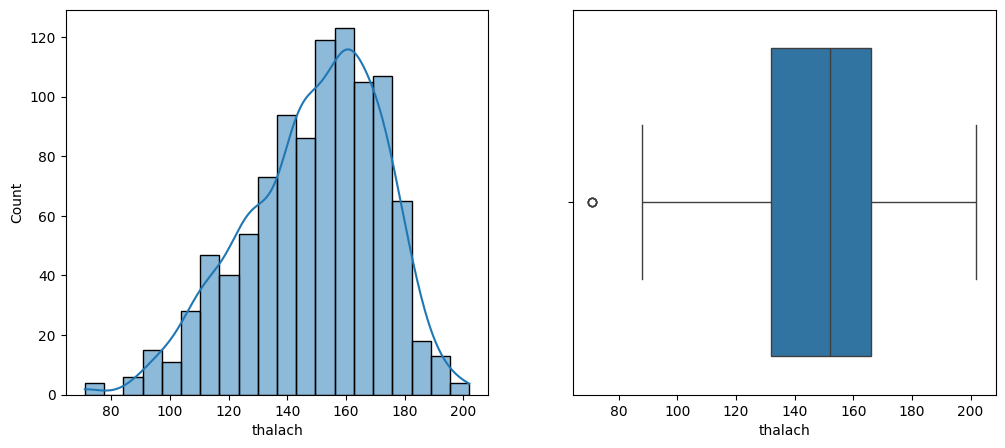

In [31]:
plot_hist_box('thalach')

In [32]:
df.sort_values('thalach').head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Group
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,65-77
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,65-77
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,65-77
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,65-77
140,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0,53-64


In [33]:
q1,q3 = np.percentile(df['thalach'],[25,75])
max = q3+(q3-q1)*1.5
min = q1-(q3-q1)*1.5
print (max)
print (min)

217.0
81.0


In [34]:
print("number of observation with max heart rate less than {} is".format(min), df[df['thalach']<min].shape[0])

number of observation with max heart rate less than 81.0 is 4


In [35]:
df[df['thalach']<min]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Group
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,65-77
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,65-77
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,65-77
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0,65-77


In [36]:
df = df.drop(df[df['thalach']<min].index)
df.shape

(1008, 15)

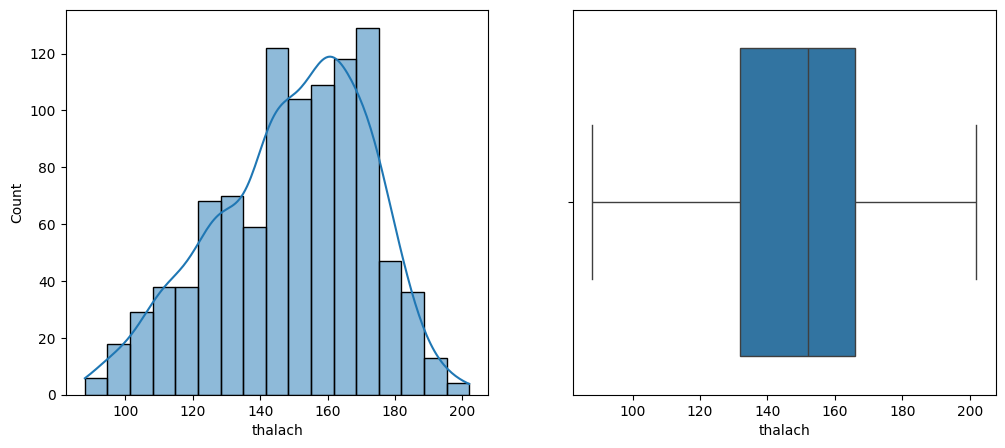

In [37]:
plot_hist_box('thalach')

**5. ST depression**

Normal (physiological) ST segment depressions occur during physical exercise. These ST segment depressions have an upsloping ST segment. The depression in the J 60 point is usually <1 mm and they resolve rapidly once the exercise is stopped.

In [38]:
df['oldpeak'].describe()

,oldpeak
count,1008.000000
mean,1.056944
std,1.169044
min,0.000000
25%,0.000000
50%,0.800000
75%,1.800000
max,6.200000


In [39]:
df.groupby(['slope'])['oldpeak'].count()

,oldpeak
slope,
0,74
1,468
2,466


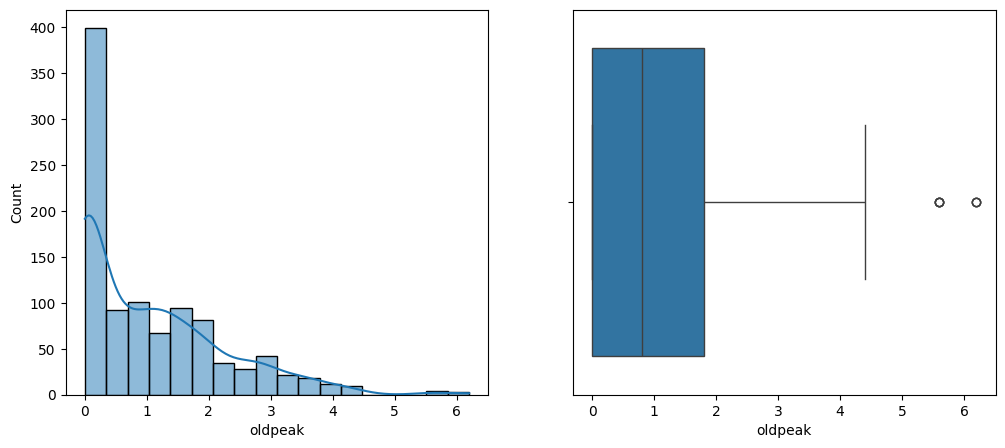

In [40]:
plot_hist_box('oldpeak')

In [41]:
df.sort_values('oldpeak').head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_Group
513,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0,53-64
759,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0,53-64
347,54,0,2,108,267,0,0,167,0,0.0,2,0,2,1,53-64
761,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1,41-52
345,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0,65-77


In [42]:
# oldpeak value for 33% of the sample is Zero
(df['oldpeak']==0).sum() / df.shape[0] * 100

32.63888888888889

**Data Exploring of the Categorical Fields**

In [43]:
# adjusting categorical data to make it more readable
df2 = df.copy()
df2['sex'] = df2['sex'].map({0:'Female',1:'Male'})
df2['target'] = df2['target'].map({1:'No heart disease',0:'Heart disease'})
df2['cp'] = df2['cp'].map({0: 'asymptomatic', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'typical angina'})
df2['thal'] = df2['thal'].map({0: 'none', 1: 'fixed defect', 2: 'normal blood flow', 3: 'reversible defect'})
df2['fbs'] = df2['fbs'].map({0: '<= 120 mg/dl', 1: '> 120 mg/dl'})
df2['restecg'] = df2['restecg'].map({0:'left ventricular hypertrophy',1: 'normal', 2: 'ST-T wave abnormality'})
df2['exang'] = df2['exang'].map({0:'no',1: 'yes'})
df2['slope'] = df2['slope'].map({0: "downsloping", 1: "flat", 2: "upsloping"})

In [44]:
df2.shape

(1008, 15)

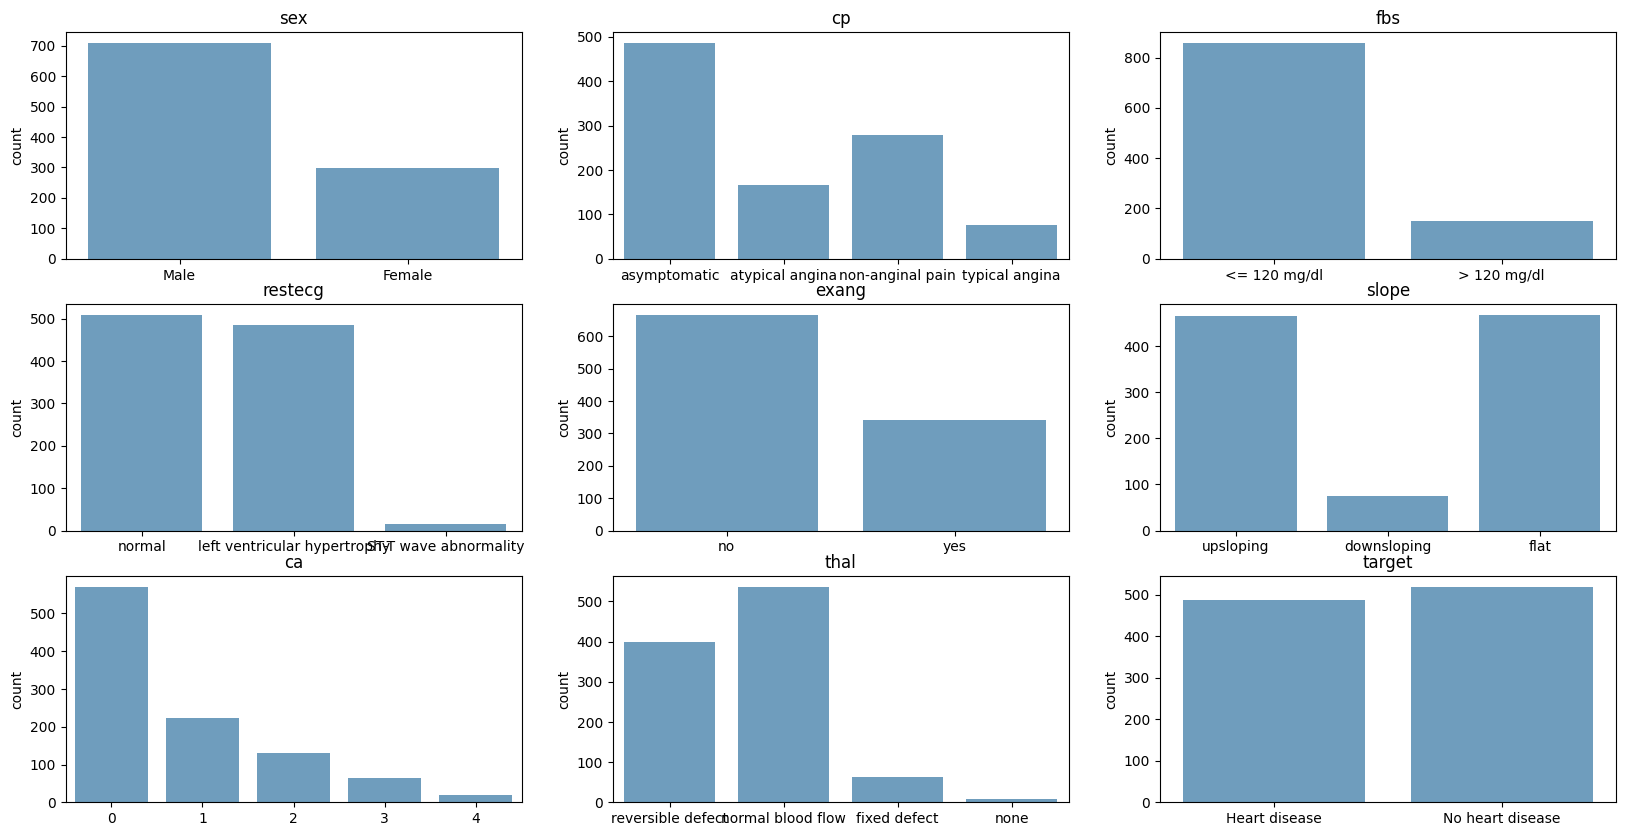

In [45]:
fig, axes = plt.subplots(nrows=len(ccol)//3,ncols=3, figsize=(20,10), sharex=False, sharey=False)
x=0
for i, col in enumerate(ccol):
    sns.countplot (x=col, data=df2, ax=axes[i//3,x], alpha=0.7)
    axes[i//3,x].set_xlabel("")
    axes[i//3,x].set_title(col)

    x+=1
    if (x==3):
        x=0

In [46]:
# based on data definintion, ca - the number of major vessels - can take the values 0–3
df['ca'].value_counts()

,count
ca,
0,571
1,223
2,131
3,65
4,18


In [47]:
df = df.drop(df[df['ca']==4].index)
df2 = df2.drop(df2[df2['ca']==4].index)
df.shape

(990, 15)

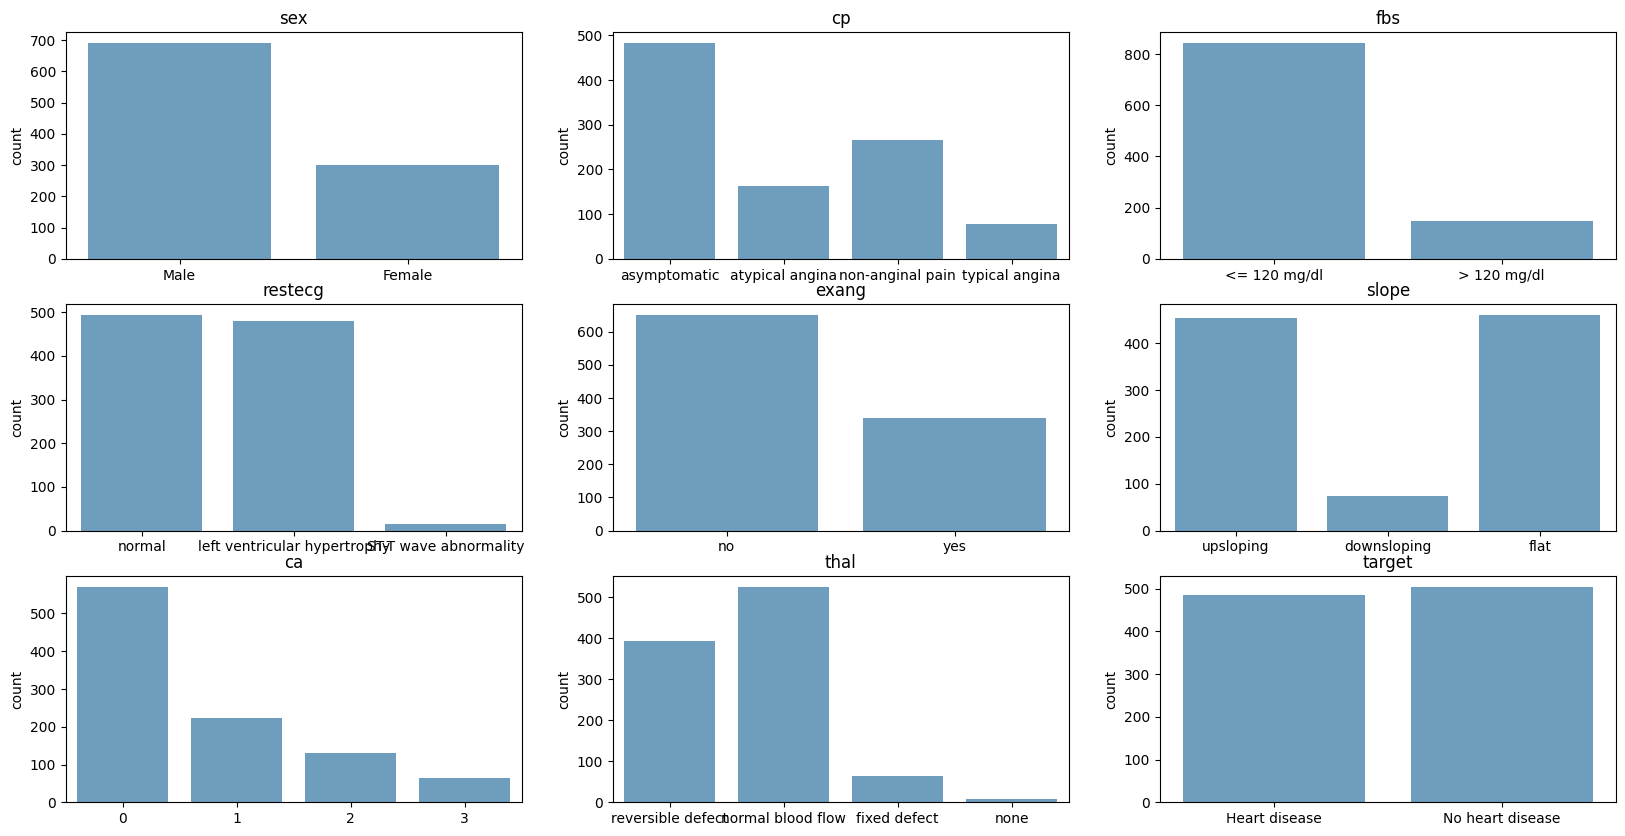

In [48]:
fig, axes = plt.subplots(nrows=len(ccol)//3,ncols=3, figsize=(20,10), sharex=False, sharey=False)
x=0
for i, col in enumerate(ccol):
    sns.countplot (x=col, data=df2, ax=axes[i//3,x], alpha=0.7)
    axes[i//3,x].set_xlabel("")
    axes[i//3,x].set_title(col)

    x+=1
    if (x==3):
        x=0

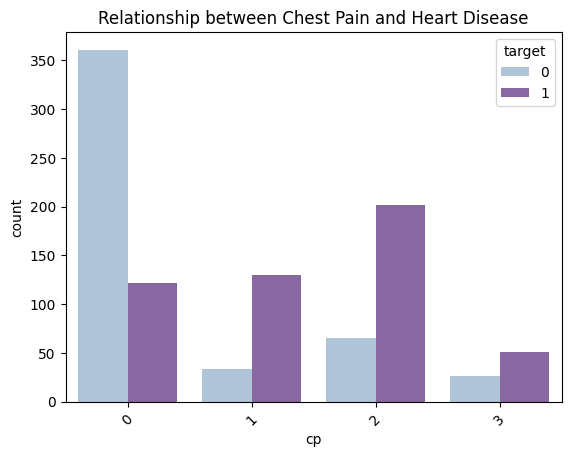

In [50]:
sns.countplot(x = "cp", data = df, hue = "target", palette = "BuPu")
plt.xticks(rotation = 45)
plt.title('Relationship between Chest Pain and Heart Disease')
plt.show()

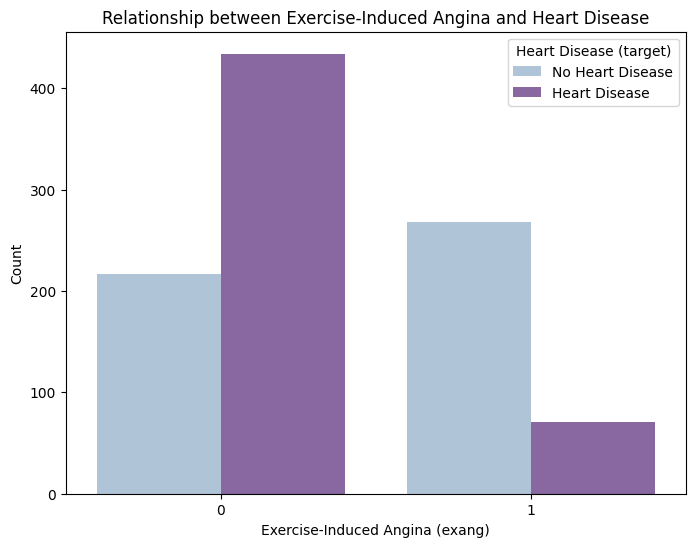

In [51]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'exang', hue = 'target', data = df, palette = 'BuPu')
plt.title('Relationship between Exercise-Induced Angina and Heart Disease')
plt.xlabel('Exercise-Induced Angina (exang)')
plt.ylabel('Count')
plt.legend(title = 'Heart Disease (target)', loc = 'upper right', labels = ['No Heart Disease', 'Heart Disease'])
plt.show()

According to the distribution plot of the odlpeak feature and target variable, patients with lower ST depression induced by exercise relative to rest have a higher chance of getting heart disease.

In [52]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'Age_Group'],
      dtype='object')

In [53]:
df98 = df.drop(['target', 'Age_Group'], axis=1)

In [54]:
df98.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [55]:
df98.shape

(990, 13)

In [56]:
# checking the distribution of Target Variable
df['target'].value_counts()

,count
target,
1,505
0,485


1 - Healthy Heart

0 - Defective Heart

**Bivariate Data Vizualizations**

            Distribution of Continuous Features vs. Target Variable             
                        _______________________________                         


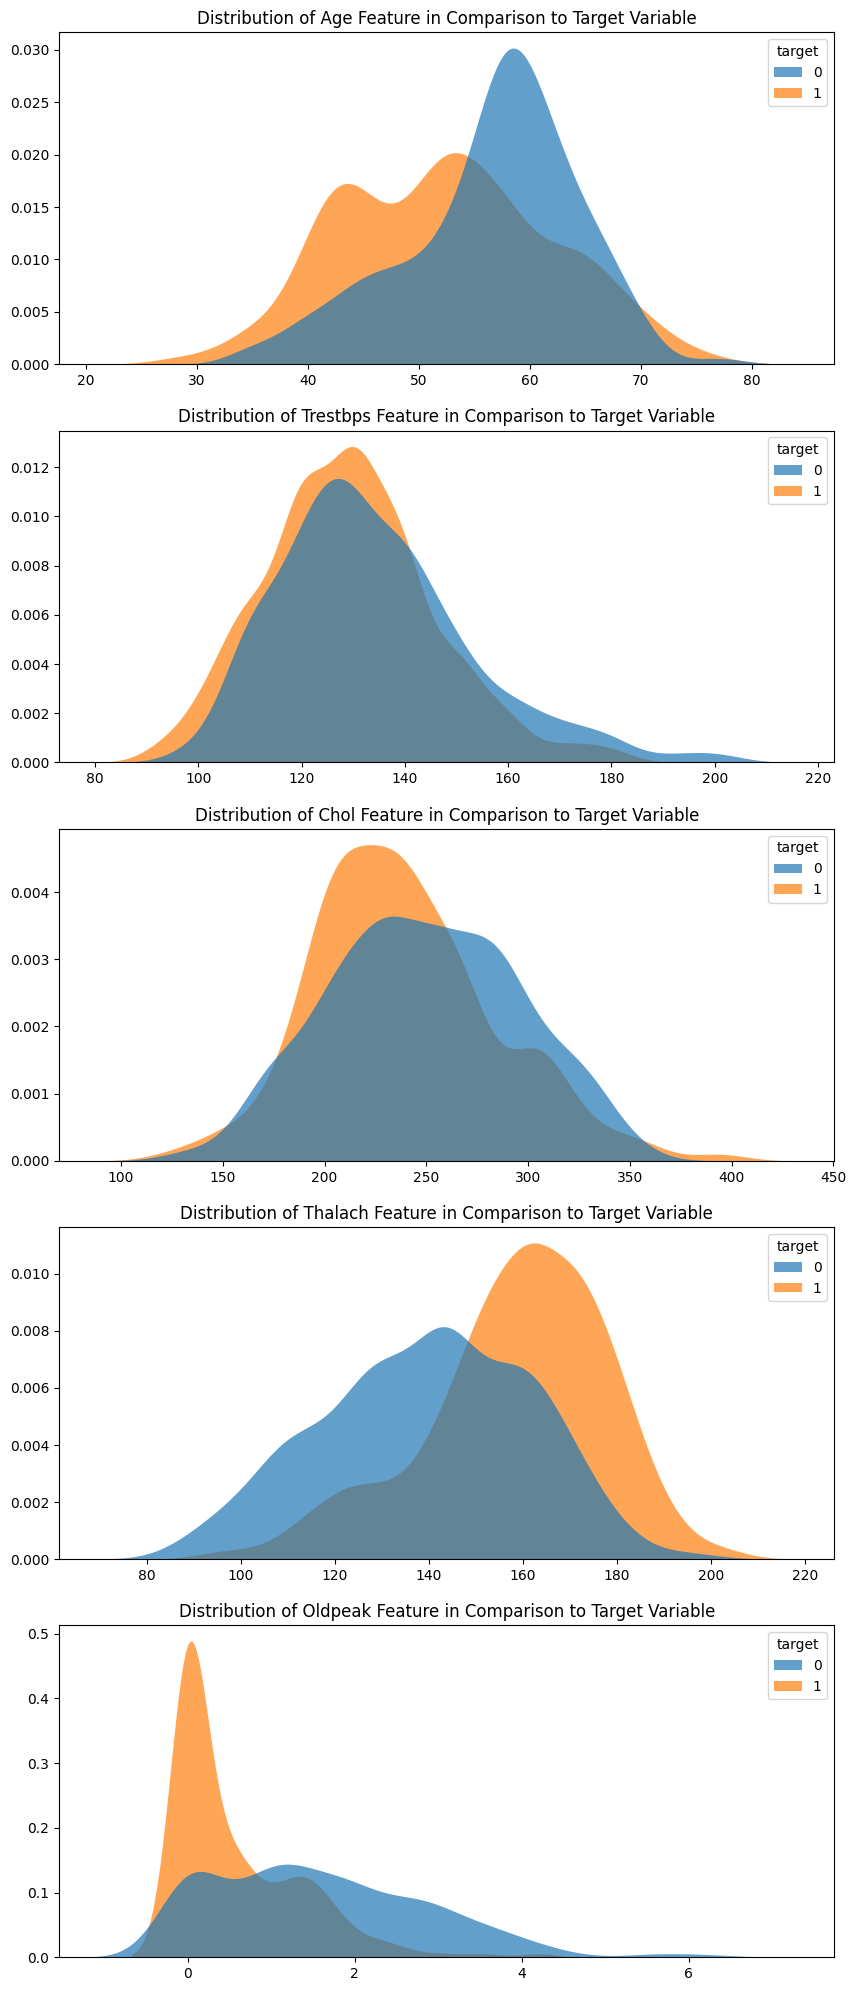

In [57]:
# Title for all density plots
title_all_graphs = "Distribution of Continuous Features vs. Target Variable"
centered_title = title_all_graphs.center(80)
underline = "_______________________________"
centered_underline = underline.center(80)
print(centered_title)
print(centered_underline)

# Distribution plots for the continuous features
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows = 5,
                                              ncols = 1,
                                              figsize = (10, 25))

# Age
sns.kdeplot(ax = ax0, data = df, x = 'age', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax0.set_title("Distribution of Age Feature in Comparison to Target Variable")
ax0.set_xlabel("")
ax0.set_ylabel("")

# Trestbps
sns.kdeplot(ax = ax1, data = df, x = 'trestbps', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax1.set_title("Distribution of Trestbps Feature in Comparison to Target Variable")
ax1.set_xlabel("")
ax1.set_ylabel("")


# Chol
sns.kdeplot(ax = ax2, data = df, x = 'chol', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax2.set_title("Distribution of Chol Feature in Comparison to Target Variable")
ax2.set_xlabel("")
ax2.set_ylabel("")

# Thalach
sns.kdeplot(ax = ax3, data = df, x = 'thalach', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax3.set_title("Distribution of Thalach Feature in Comparison to Target Variable")
ax3.set_xlabel("")
ax3.set_ylabel("")

# Oldpeak
sns.kdeplot(ax = ax4, data = df, x = 'oldpeak', hue = 'target', fill = True, alpha = 0.7, linewidth = 0)
ax4.set_title("Distribution of Oldpeak Feature in Comparison to Target Variable")
ax4.set_xlabel("")
ax4.set_ylabel("");

In [59]:
with_heart_disease = df[df['target'] == 0]
with_heart_disease.shape

(485, 15)

In [60]:
with_heart_disease["sex"].value_counts(normalize = True) * 100

,proportion
sex,
1,83.71134
0,16.28866


In [61]:
# Lets compare the chest pain of normal and heart diseased patients:
attr_1=df[df['target']==1]
attr_0=df[df['target']==0]

<ipython-input-63-e765cfbdbc00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp',data=attr_0, palette='Set2')


Text(0.5, 1.0, 'Heart Patient Chest Pain')

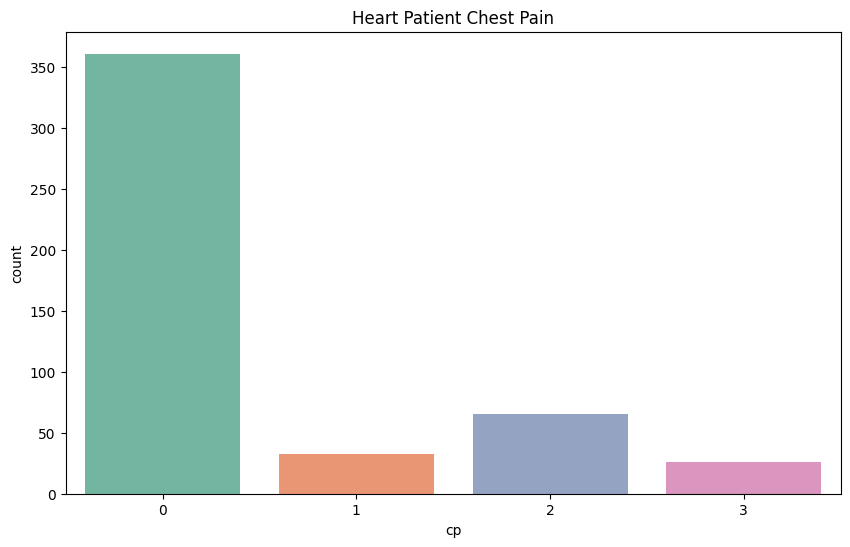

In [63]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='cp',data=attr_0, palette='Set2')
plt.title('Heart Patient Chest Pain')


<ipython-input-64-58c5f9c2804b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp',data=attr_1, palette='Set2')


Text(0.5, 1.0, 'Normal Patient Chest Pain')

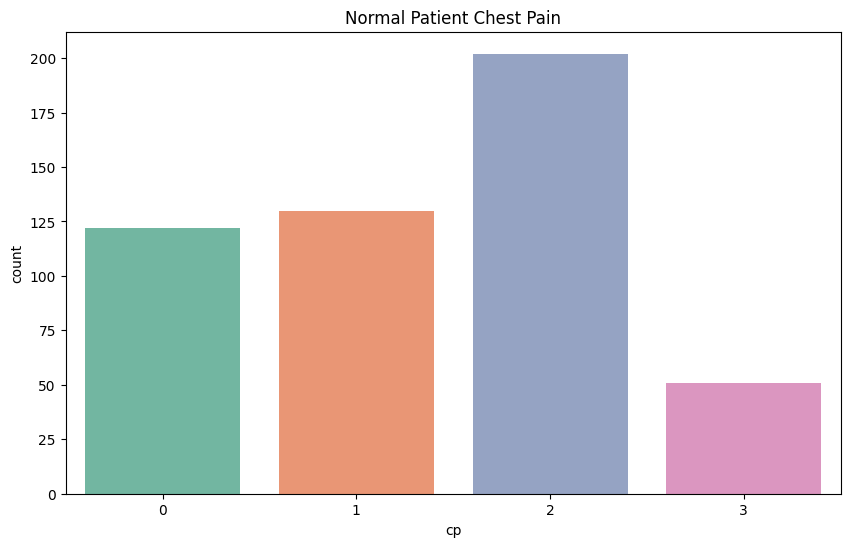

In [64]:
# plot
plt.figure(figsize=(10,6))
sns.countplot(x='cp',data=attr_1, palette='Set2')
plt.title('Normal Patient Chest Pain')

In [67]:
percentage_heart_disease = df.groupby('cp')['target'].value_counts(normalize = True) * 100

print("Percentage of Heart Disease for Each Category of Chest Pain:")
print(percentage_heart_disease)

Percentage of Heart Disease for Each Category of Chest Pain:
cp  target
0   0         74.741201
    1         25.258799
1   1         79.754601
    0         20.245399
2   1         75.655431
    0         24.344569
3   1         66.233766
    0         33.766234
Name: proportion, dtype: float64


In [65]:
percentage_heart_disease = df.groupby('exang')['target'].value_counts(normalize = True) * 100

print("Percentage of Heart Disease for Each Category of Exercise-Induced Angina:")
print(percentage_heart_disease)

Percentage of Heart Disease for Each Category of Exercise-Induced Angina:
exang  target
0      1         66.666667
       0         33.333333
1      0         79.056047
       1         20.943953
Name: proportion, dtype: float64



*   84% of males has heart disease, while 16% are females
*   Patients with Chest Pain types typical angina, non-anginal and atypical angina has the lowest chance of having heart disease. Contrarary to that, people with asymptomatic chest pain has the highest chance of 74% to have heart disease.

*   Males achieve higher maximum heart rates then females during exercise.
Patients with maximum heart rate achieved less then 110 are more likely to have heart disease.
*   Patients with Exercise-Induced Angina are more likely to have heart disease with 79% chance. Patients without Exercise-Induced Angina has 33% chance to have heart disease.


**Data Preprocessing**

Splitting Data into X and Y . [Seperating dependent variable]

In [68]:
X = df98

In [69]:
X.shape

(990, 13)

In [70]:
Y = df['target']

In [71]:
Y.shape

(990,)

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Splitting Data into Train and Test sets

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=28)


**Logistic Regression**

In [74]:
model = LogisticRegression()

In [75]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [77]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8643578643578643


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8695652173913043


Building a Predictive System

In [78]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 1):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')



[0]
The Person has Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Testing Logistic Regression, KNeighborsClassifier, Support Vector Classifier and Random Forest Classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

We are going to try 4 ML models

1. Logistic Regression
2. Knearest Neighbours Classifier
3. Support Vector Classifier
4. Randome Forest Classifier

In [84]:
## Put models in a dictionary
from sklearn.svm import SVC

models = {'LR': LogisticRegression(), 'KN': KNeighborsClassifier(), 'SVC': SVC(), 'RFC': RandomForestClassifier()}


## Create function to fit and score models

def fit_and_score(models, X_train,X_test,y_train,y_test):
    """
    Fit, train and score different models of sklear
    models: dictionary of models
    X_train: training data
    X_test: testing data
    y_train: training labels
    y_test: testing labels
    """
    ## setting random seed
    np.random.seed(42)
    ## Dictionary for storing score

    model_score = {}

    ## Defining Function

    for model_name, models in models.items():
        ## Fit the model
        models.fit(X_train, y_train)
        ## Score and save the score
        model_score[model_name] = models.score(X_test, y_test)

    return model_score

In [85]:
model_score = fit_and_score(models=models, X_train=X_train,X_test=X_test,y_train=Y_train,y_test=Y_test)

model_score

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8720538720538721,
 'KN': 0.7003367003367004,
 'SVC': 0.7037037037037037,
 'RFC': 0.9797979797979798}

Model Score:
Logistic Regression : 0.87

KNN Classifier : 0.72

Support Vector Classifier : 0.71

Random Forest Classifier : 0.98

**Model Comparison Chart**

<Axes: >

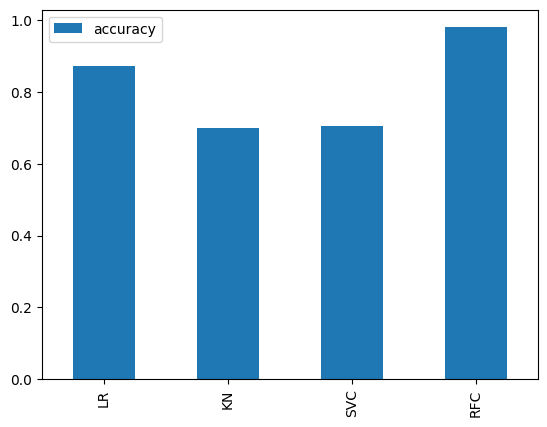

In [86]:
model_compare = pd.DataFrame(model_score, index=['accuracy'])
model_compare.T.plot.bar()

Now we've got a baseline model. Measures to increase performance of our model's predictions

*  Hyperparameter Tuning
*  Feature Importance
*  Confusion Matrix
*  Precision, Recall, F1 Score
*  Classification Report
*   AUC , ROC Curve

In [87]:
# Let's tune KNN
train_scores = []

test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, Y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, Y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, Y_test))


Hyperparameter tuning with RandomizedSearchCV
we're going to tune:

LogisticRegression()

SupportVectorClassifier()

RandomForestCLassifier()

... using RandomizedSearchCV

In [88]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }

In [89]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions= log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit randor hyperparameter seach model for logisticRegression

rs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [90]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

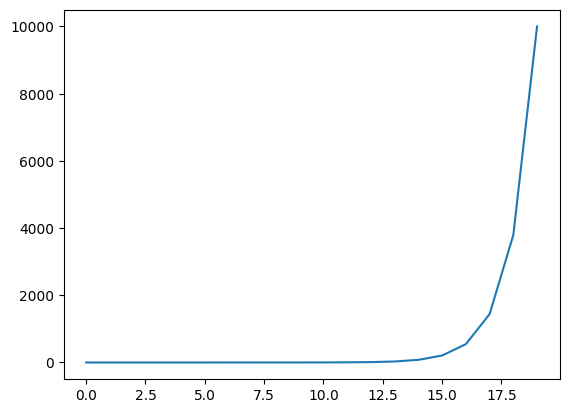

In [91]:
plt.plot(log_reg_grid["C"])

In [92]:
rs_log_reg.score(X_test, Y_test)

0.8653198653198653

Score for Logistic Regression Model with RandomizedSearchCV is 0.86

In [93]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)
#Fit random hyperparameters search model for RandomForestClassifier()
rs_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [94]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [95]:
rs_rf.score(X_test, Y_test)

0.9730639730639731

Score for Random Forest Classifier with Randomized Search CV : 0.97

Hyperparameter Tuning with GridSearchCV
Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [99]:
# Differente hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver":["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid= log_reg_grid,
                          cv=5,
                          verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [100]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [101]:
# Evaluate the grid search logisitcRegression model
gs_log_reg.score(X_test, Y_test)

0.8653198653198653

Score for Logistic Regression Model with GridSearchCV : 0.86

Evaluating our tuned machine learning classifier, beyond accuracy

ROC curve and AUC score

Confusion matrix

Classifiaction report

Precision

Recall

F1-score

In [102]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [103]:
prob_preds = gs_log_reg.predict_proba(X_test)
prob_preds[:10]

array([[0.02368383, 0.97631617],
       [0.16838022, 0.83161978],
       [0.94982321, 0.05017679],
       [0.54485036, 0.45514964],
       [0.32172666, 0.67827334],
       [0.07325355, 0.92674645],
       [0.28067546, 0.71932454],
       [0.04200236, 0.95799764],
       [0.3191743 , 0.6808257 ],
       [0.37075637, 0.62924363]])

In [104]:
positive_preds = prob_preds[:,1]

In [105]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

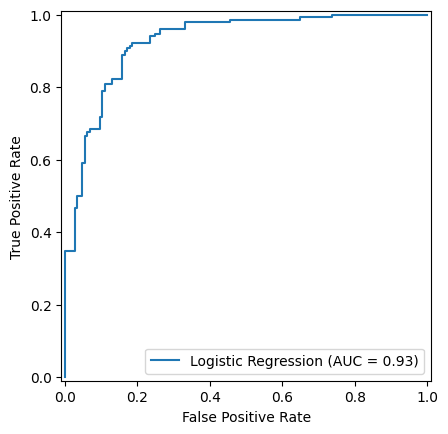

In [106]:
# Plot ROC curve and calculate AUC metric

fpr, tpr, thresholds = roc_curve(Y_test, positive_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Logistic Regression')
display.plot();

Area Under the Curve for Logistic Regression is 0.93

In [107]:
# Confusion matrix
cm = confusion_matrix(Y_test, y_preds)
print(cm)

[[119  26]
 [ 14 138]]


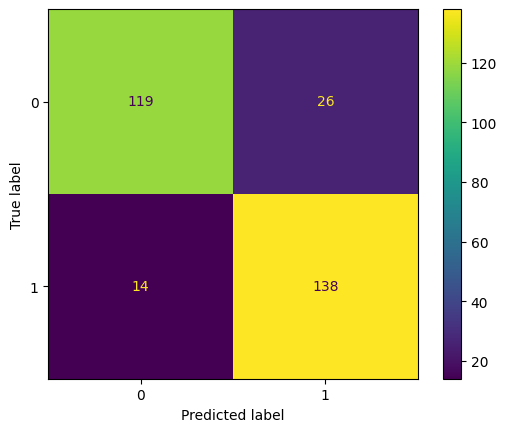

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
#cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= gs_log_reg.classes_)
disp.plot();

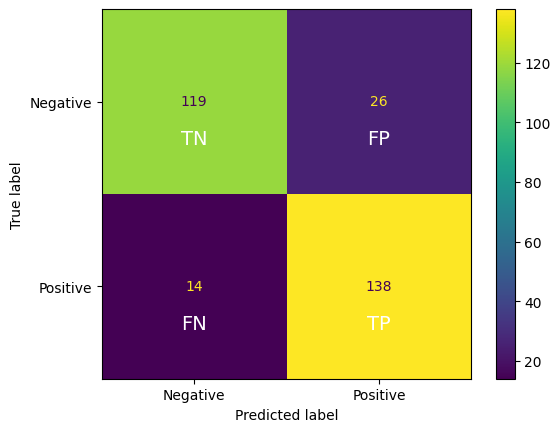

In [109]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Negative", "Positive"])

disp.plot();
plt.style.use("default")

# Add TN, FP, FN, TP labels
labels = ['TN', 'FP', 'FN', 'TP']
label_positions = [(0,0), (0,1), (1,0), (1,1)]
offset = 0.2
for label, pos in zip(labels, label_positions):
    x_plot, y_plot = pos
    plt.text(y_plot, x_plot+offset, label, ha="center", va="center", color="white", fontsize=14)


plt.show()

In [110]:
gs_log_reg.classes_

array([0, 1])

In [111]:
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       145
           1       0.84      0.91      0.87       152

    accuracy                           0.87       297
   macro avg       0.87      0.86      0.86       297
weighted avg       0.87      0.87      0.86       297



Calculate evaluation metrics using cross validation
we're going to calculate precision, recall and f1-score of our model using cross-validation

In [112]:
# check best hyperparameters
gs_log_reg.best_params_


{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [113]:
# Create a new classifier with best parameters

clf = LogisticRegression(C= 0.20433597178569418,
                         solver="liblinear")

In [114]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5,
                         scoring="accuracy")
cv_acc


array([0.9040404 , 0.84848485, 0.88888889, 0.82828283, 0.81818182])

In [115]:
cv_acc_mean = np.mean(cv_acc)

cv_acc_mean

0.8575757575757577

In [116]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               Y,
                               cv=5,
                               scoring="precision")
cv_precision

array([0.87272727, 0.8317757 , 0.86238532, 0.78632479, 0.79279279])

In [117]:
cv_precision_mean = np.mean(cv_precision)
cv_precision_mean

0.8292011747760698

In [118]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X,
                            Y,
                            cv=5,
                            scoring="recall")
cv_recall_mean = np.mean(cv_recall)
cv_recall_mean

0.9089108910891088

In [119]:
# Cross-validated f1-score

cv_f1 = cross_val_score(clf,
                        X,
                        Y,
                        cv=5,
                        scoring="f1")

cv_f1_mean = np.mean(cv_f1)
cv_f1_mean

0.8670370618270773

Cross Validated F1 Score = 0.86

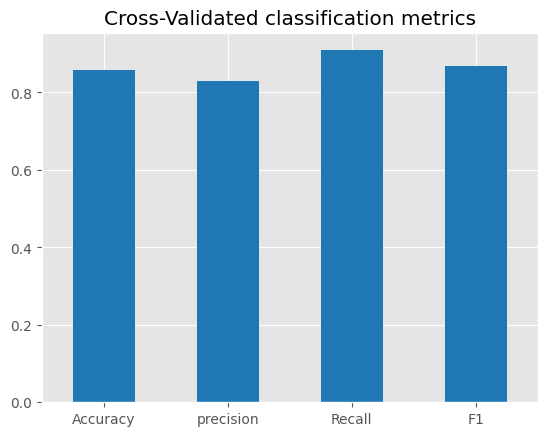

In [120]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc_mean,
                          "precision": cv_precision_mean,
                          "Recall": cv_recall_mean,
                          "F1": cv_f1_mean},
                         index=[0])
plt.style.use("ggplot")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'])

cv_metrics.T.plot.bar(title="Cross-Validated classification metrics",
                     legend=False, color="tab:blue")
plt.xticks(rotation=0);

**Feature importance**

which features contributed most to the outcomes of the model and how did they contribute?

finding feature importance is different for each machine learning model.

We'll analyze the feature importance for our LogisticRegression model

In [121]:
# FIt and instance of LogisticRegression
gs_log_reg.best_params_

{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [122]:
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")
clf.fit(X_train, Y_train);

In [123]:
# check coef_
clf.coef_

array([[ 0.03118418, -1.26827781,  0.6701276 , -0.01317367, -0.0093748 ,
        -0.12517682,  0.28578747,  0.02876682, -0.63150853, -0.47217448,
         0.50670775, -0.9982884 , -0.67364127]])

In [124]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.031184184521175894,
 'sex': -1.2682778085557547,
 'cp': 0.6701276014891563,
 'trestbps': -0.013173667357027788,
 'chol': -0.009374803017807071,
 'fbs': -0.12517682450798084,
 'restecg': 0.2857874673003446,
 'thalach': 0.028766823508466807,
 'exang': -0.6315085291779015,
 'oldpeak': -0.4721744773383235,
 'slope': 0.5067077543327152,
 'ca': -0.9982884044827521,
 'thal': -0.6736412712123953}

In [125]:
var = zip(df.columns, list(clf.coef_[0]))
dict(var)

{'age': 0.031184184521175894,
 'sex': -1.2682778085557547,
 'cp': 0.6701276014891563,
 'trestbps': -0.013173667357027788,
 'chol': -0.009374803017807071,
 'fbs': -0.12517682450798084,
 'restecg': 0.2857874673003446,
 'thalach': 0.028766823508466807,
 'exang': -0.6315085291779015,
 'oldpeak': -0.4721744773383235,
 'slope': 0.5067077543327152,
 'ca': -0.9982884044827521,
 'thal': -0.6736412712123953}

<Axes: title={'center': 'Feature importance'}>

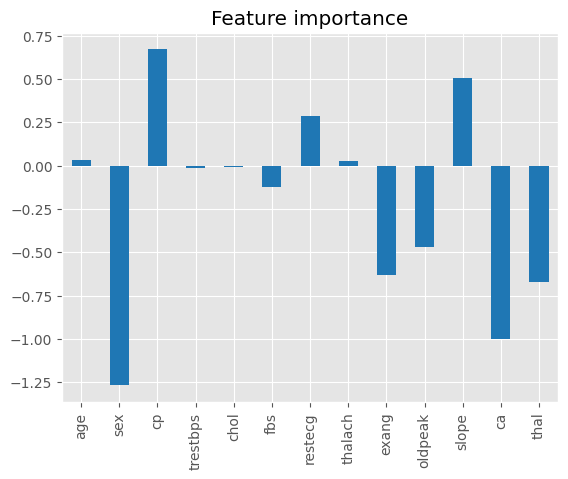

In [126]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title= "Feature importance", legend=False)

Chest Pain is a major sign and contributor for heart disease. Other main contributor is Maximum heart rate and exercise induced angina.

In [127]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,46,28
1,310,151
2,129,326


In [128]:
pd.crosstab(X_test["slope"], clf.predict(X_test))

col_0,0,1
slope,,
0,12,6
1,87,60
2,30,102
